In [1]:
%run ./Vlad_Dissertation.ipynb

/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
/tmp/ipykernel_24293/1247435164.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


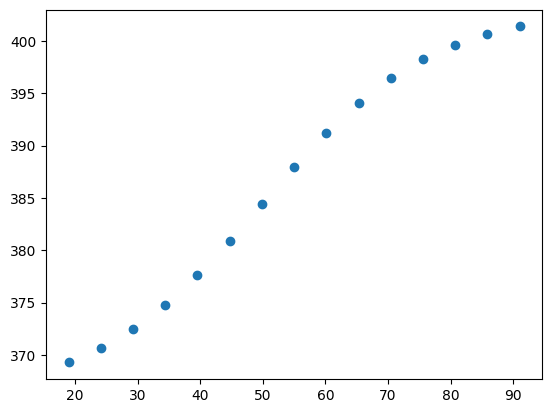

In [2]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
s_distances_sec = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
mydistances = 100 - s_distances_sec * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

##Pre-Training
###Healthy Controls
ymin = 366
ymax = 403
scz_cp = 100 - 1.666 * 30
scz_slope = 1 / 0.075

SCZ_RTs = RTsig(mydistances, scz_cp, scz_slope)
plt.scatter(mydistances, SCZ_RTs)

In [3]:
from scipy.optimize import differential_evolution

HCWat, HCWvt, HCWav = crossmodal(1.3, 2, 1.3, 2, 1.3, 2)


def sczmodelrun(theta):
    SCZLt, SCZLa, SCZLv = Lw(
        theta[0], 0.05, 1, 4, theta[0], 0.05, 20, 80, theta[0], 0.05, 2, 8
    )
    HCWt, HCWa, HCWv, SCZBt, SCZBa, SCZBv = FwFb(
        6.5,
        6.5,
        6.5,
        theta[1],
        theta[1],
        theta[1],
        1.185e01,
        7.769e02,
        3.881e01,
        9.517e-01,
    )
    _, _, _, _, SCZrt = experiment(
        ts,
        simtime,
        mydistances,
        5,
        SCZLt,
        SCZLa,
        SCZLv,
        HCWt,
        HCWa,
        HCWv,
        SCZBt,
        SCZBa,
        SCZBv,
        HCWat,
        HCWvt,
        HCWav,
        theta[2],
        0,
    )

    xf = SCZrt
    yf = SCZ_RTs

    m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
        xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
    )
    bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

    if bias < 0:
        bias = 0
    if m < 0:
        m = 0

    cost = np.sum(np.square(np.divide(yf - (m * xf + bias), yf)))

    return cost * 100000


bounds = [(0, 9), (4.5, 6.55), (0, 6.5)]
sczres = differential_evolution(
    sczmodelrun, bounds, disp=True, workers=-1, updating="deferred", polish=False
)

/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_24293/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_24293/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_24293/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: invalid value enc

differential_evolution step 1: f(x)= 23.378680513569762


/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_24293/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (


differential_evolution step 2: f(x)= 14.523026906723198


/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_24293/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (


differential_evolution step 3: f(x)= 14.523026906723198
differential_evolution step 4: f(x)= 13.790246033069378
differential_evolution step 5: f(x)= 13.790246033069378
differential_evolution step 6: f(x)= 13.185685277007439
differential_evolution step 7: f(x)= 12.354354156630585
differential_evolution step 8: f(x)= 10.672737213766299
differential_evolution step 9: f(x)= 10.672737213766299
differential_evolution step 10: f(x)= 10.672737213766299
differential_evolution step 11: f(x)= 10.672737213766105
differential_evolution step 12: f(x)= 10.672737213766105
differential_evolution step 13: f(x)= 10.672737213766105
differential_evolution step 14: f(x)= 10.672737213766105
differential_evolution step 15: f(x)= 10.672737213766105
differential_evolution step 16: f(x)= 10.672737213766105
differential_evolution step 17: f(x)= 10.672737213766105
differential_evolution step 18: f(x)= 10.672737213766105
differential_evolution step 19: f(x)= 10.672737213766105
differential_evolution step 20: f(x)= 

In [4]:
print(sczres)

             message: Optimization terminated successfully.
             success: True
                 fun: 10.672737213765808
                   x: [ 8.546e+00  5.852e+00  5.934e-02]
                 nit: 74
                nfev: 3375
          population: [[ 8.546e+00  5.852e+00  5.934e-02]
                       [ 8.517e+00  5.908e+00  1.192e-01]
                       ...
                       [ 8.535e+00  5.880e+00  3.770e-02]
                       [ 8.514e+00  5.919e+00  6.269e-02]]
 population_energies: [ 1.067e+01  1.067e+01 ...  1.067e+01  1.067e+01]


In [5]:
## Fitted model

Lex, B0, Pr = 8.546e00, 5.852e00, 5.934e-02
SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(1.3, 2, 1.3, 2, 1.3, 2)
HCWt, HCWa, HCWv, SCZBt, SCZBa, SCZBv = FwFb(
    6.5, 6.5, 6.5, B0, B0, B0, 1.185e01, 7.769e02, 3.881e01, 9.517e-01
)
_, _, _, _, SCZ_Model_RTs = experiment(
    ts,
    simtime,
    mydistances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    SCZBt,
    SCZBa,
    SCZBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    0,
)

/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_24293/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_24293/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (


5.149427662193006 176.12548639198414


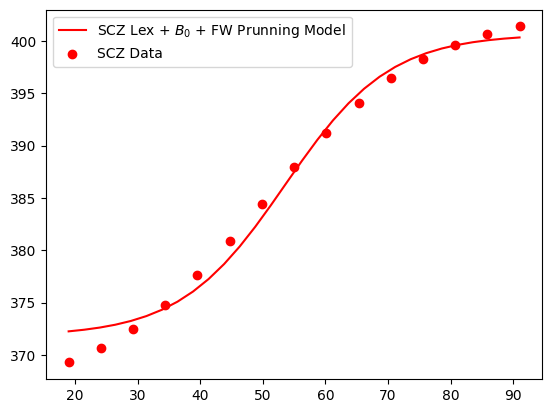

In [6]:
xf = SCZ_Model_RTs
yf = SCZ_RTs
m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
    xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
)
bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

ymin, ymax = np.min(m * xf + bias), np.max(m * xf + bias)
dc, h = fitting(mydistances, m * xf + bias)
mydistances_exp = np.linspace(mydistances[0], mydistances[-1], 30)
yf_exp = RTsig(mydistances_exp, dc, h)

plt.figure(1)
plt.plot(
    mydistances_exp, yf_exp, label="SCZ Lex + $B_{0}$ + FW Prunning Model", color="r"
)
plt.scatter(mydistances, yf, label="SCZ Data", color="r")
plt.legend()
print(m, bias)

In [7]:
from sklearn import metrics

print(metrics.root_mean_squared_error(yf, m * xf + bias))

1.0039773643450958


In [8]:
def adjrmse(model, data, k):
    sse = np.sum(np.square(data - model))
    n = len(model)
    return np.sqrt(sse / (n - k))


scz_error = adjrmse(m * xf + bias, yf, 5)
print(scz_error)

1.2296161279749007
